In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [4]:
las = lasio.read("/content/15-9-19_SR_COMP.LAS")

#  investigating it's contents.

In [14]:
for item in las.well:
  print(f"{item.descr}({item.mnemonic}):{item.value}")

Top Depth(STRT):102.1568
Bottom Depth(STOP):4636.514
Depth Increment(STEP):0.1524
Null Value(NULL):-999.25
Field Name(FLD):Q15
NAME(WELL):15/9-19
WELLBORE(WBN):15/9-19 SR
COUNTRY(NATI):NOR
COUNTRY(CTRY):NOR
OPERATOR(COMP):STATOIL
PERM DATUM(PDAT):MSL
RIG NAME(COUN):NORTH SEA
STATE(STAT):NORWAY
PB WELL ID(PBWE):15/9-19
PB WELLBORE ID(APIN):15/9-19 SR
PB WELL NAME SET(PBWS):ALL


In [6]:
well = las.df()

In [11]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29754 entries, 102.1568 to 4636.514
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      7007 non-null   float64
 1   CALI    7007 non-null   float64
 2   DEN     7084 non-null   float64
 3   GR      28117 non-null  float64
 4   NEU     7096 non-null   float64
 5   RDEP    12223 non-null  float64
 6   RMED    12223 non-null  float64
dtypes: float64(7)
memory usage: 1.8 MB


In [10]:
well.isnull().sum()

AC      22747
CALI    22747
DEN     22670
GR       1637
NEU     22658
RDEP    17531
RMED    17531
dtype: int64

In [17]:
well.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781
std,18.390705,1.019751,0.165122,32.922780,14.729530,6.631202,5.735731
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400
max,181.813900,20.330400,3.001300,304.333700,146.347400,198.537100,168.604400


In [18]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29754 entries, 102.1568 to 4636.514
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      7007 non-null   float64
 1   CALI    7007 non-null   float64
 2   DEN     7084 non-null   float64
 3   GR      28117 non-null  float64
 4   NEU     7096 non-null   float64
 5   RDEP    12223 non-null  float64
 6   RMED    12223 non-null  float64
dtypes: float64(7)
memory usage: 1.8 MB


In [21]:
well_nan = well.notnull() *1

In [23]:
well_nan.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,0,0,0,1,0,0,0
102.3092,0,0,0,1,0,0,0
102.4616,0,0,0,1,0,0,0
102.6140,0,0,0,1,0,0,0
102.7664,0,0,0,1,0,0,0


<ipython-input-52-71f94ad203cf>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)


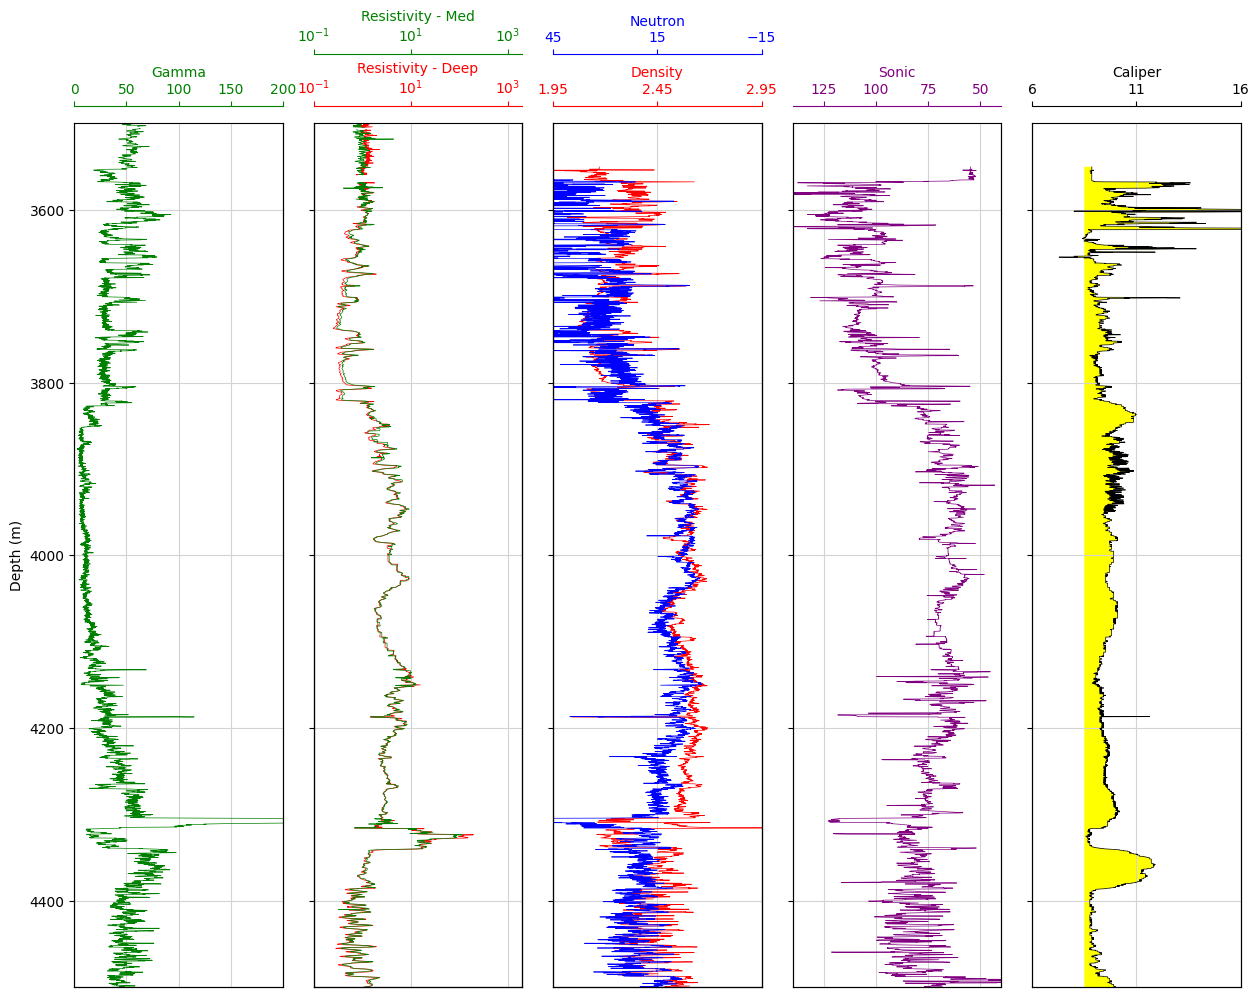

In [52]:
fig, ax = plt.subplots(figsize=(15,10))

############################################
#Set up the plot axes
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax2.twiny()
#ax8 = ax6.twiny()
######################################################
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)
########################################################

# Gamma Ray track
ax1.plot(well["GR"], well.index, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.set_xticks([0, 50, 100, 150, 200])

###########################################################################

# Resistivity track
ax2.plot(well["RDEP"], well.index, color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity - Deep")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

############################################################################

# Density track
ax3.plot(well["DEN"], well.index, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

########################################################################

# Sonic track
ax4.plot(well["AC"], well.index, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

##########################################################################
# Neutron track placed ontop of density track
ax5.plot(well["NEU"], well.index, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(45, -15)
ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([45,  15, -15])

############################################################################

# Caliper track
# Plot the original CALI curve
ax6.plot(well["CALI"], well.index, color = "black", linewidth = 0.5)
ax6.set_xlabel("Caliper")
ax6.set_xlim(6, 16)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.fill_betweenx(well_nan.index, 8.5, well["CALI"], facecolor='yellow')
ax6.set_xticks([6,  11, 16])




# Caliper track placed ontop of density track
#ax8.plot(well["CALI"], well.index, color = "black", linewidth = 0.5)
#ax8.set_xlim(16, 6)
#ax8.set_ylim(4150, 3500)
#ax8.set_xticks([16,  11, 6])
#ax8.fill_betweenx(well_nan.index, 8.5, well["CALI"], facecolor='yellow')





#############################################################################
# Resistivity track - Curve 2
ax7.plot(well["RMED"], well.index, color = "green", linewidth = 0.5)
ax7.set_xlabel("Resistivity - Med")
ax7.set_xlim(0.2, 2000)
ax7.xaxis.label.set_color("green")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="green")
ax7.spines["top"].set_edgecolor("green")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.set_ylim(4500, 3500)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
for ax in [ax2, ax3, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)

<ipython-input-105-fb9575c29693>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax6 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1, sharey = ax1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

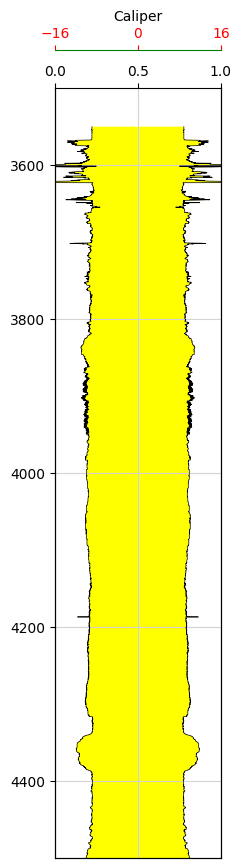

In [105]:
fig, ax = plt.subplots(figsize=(15,10))

ax6 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax6.twiny()

# Caliper track
# Plot the original CALI curve
ax6.plot(well["CALI"], well.index, color = "black", linewidth = 0.5)
ax6.plot(-1*well["CALI"], well.index, color = "black", linewidth = 0.5)
ax6.set_ylim(4500, 3500)
ax6.set_xlabel("Caliper")
ax6.xaxis.set_label_position("top") #position of label 
ax6.set_xlim(-16, 16)
ax6.xaxis.label.set_color("black") #color of label
ax6.tick_params(axis='x', colors="red") # color of xaxis scale with red color
ax6.xaxis.set_ticks_position("top") # position of xaxis scale at top
ax6.spines["top"].set_edgecolor("green") #position and color of line of scale ( top of log with black green)
ax6.spines["top"].set_position(("axes", 1.05)) #position of scale numbers (at top of curve (6-16))   and space between log and scale 1.05
ax6.fill_betweenx(well_nan.index, 0, well["CALI"], facecolor='yellow')
ax6.fill_betweenx(well_nan.index, 0, -1*well["CALI"], facecolor='yellow')
ax6.set_xticks([-16,0, 16])
ax6.grid(which='major', color='lightgrey', linestyle='-')
